In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('covid_toy.csv')

In [ ]:
df.head(6)

,age,gender,fever,cough,city,has_covid
0,60,Male,103,Mild,Kolkata,No
1,27,Male,100,Mild,Delhi,Yes
2,42\n31,Male\nFemale,101\n98,Mild\nMild,Delhi\nKolkata,No\nNo
3,65,Female,101,Mild,Mumbai,No
4,84,Female,NaN,Mild,Bangalore,Yes
5,14\n20,Male\nFemale,101,Strong\nStrong,Bangalore\nMumbai,No\nYes


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['age'].describe()

,age
count,76
unique,61
top,19
freq,3


<Axes: xlabel='age'>

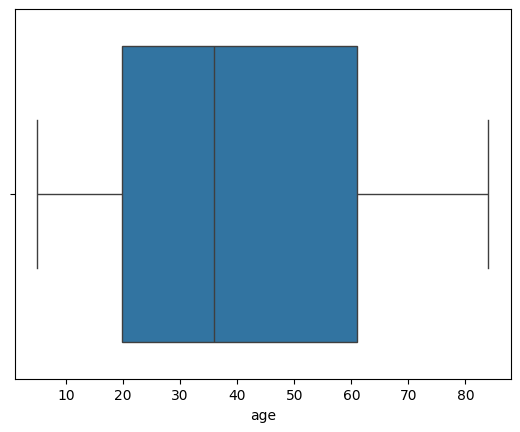

In [ ]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')
sns.boxplot(x=df['age'])


<Axes: xlabel='age'>

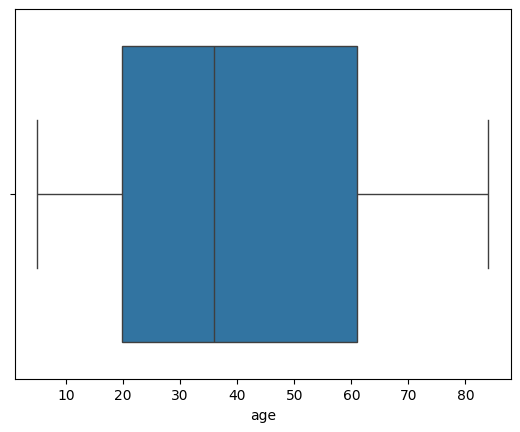

In [ ]:
sns.boxplot(x = df['age'])

In [ ]:
## Finding the IQR

percentile25 = df['age'].quantile(0.25)
percentile75 = df['age'].quantile(0.75)

In [ ]:
percentile25

np.float64(19.75)

In [ ]:
percentile75

np.float64(61.0)

In [ ]:
IQR = percentile75 - percentile25
IQR

np.float64(41.25)

In [ ]:
upper_fence = percentile75 + 1.5 * (IQR)
lower_fence = percentile25 - 1.5 * (IQR)
print("Upper Limit: ", upper_fence)
print("Lower Limit: ", lower_fence)

Upper Limit:  122.875
Lower Limit:  -42.125


In [ ]:
df[df['age'] > upper_fence]

,age,gender,fever,cough,city,has_covid


In [ ]:
df[df['age'] < lower_fence]

,age,gender,fever,cough,city,has_covid


In [ ]:
## Trimming ---> Outlier Removing Technique
new_df = df[df['age'] < upper_fence]
new_df

,age,gender,fever,cough,city,has_covid
0,60.0,Male,103,Mild,Kolkata,No
1,27.0,Male,100,Mild,Delhi,Yes
3,65.0,Female,101,Mild,Mumbai,No
4,84.0,Female,NaN,Mild,Bangalore,Yes
6,19.0,Female,100,Strong,Bangalore,No
7,64.0,Female,101,Mild,Delhi,No
9,25.0,Female,99,Strong,Kolkata,No
10,64.0,Male,102,Mild,Bangalore,Yes
12,69.0,Female,103,Mild,Kolkata,Yes
13,40.0,Female,98,Strong,Delhi,No


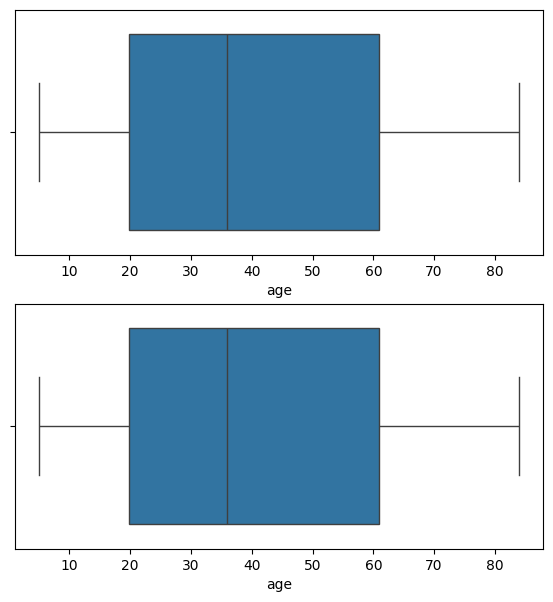

In [ ]:
## Comparison
plt.figure(figsize= (15,7))

plt.subplot(222) # 2 X 2 X 2 Grid
sns.boxplot(x = df['age'])

plt.subplot(224) #Again uses a 2 × 2 grid., 224 means 4th position (bottom-right).
sns.boxplot(x = new_df['age'])

plt.show()


In [ ]:
## Capping (Outlier Removing Technique)
new_df_cap = df.copy()

In [ ]:
import numpy as np

new_df_cap['age'] = np.where(
    new_df_cap['age'] > upper_fence, #np.where(condition, value_if_true, value_if_false)
    upper_fence,
    np.where(
        new_df_cap['age'] < lower_fence,
        lower_fence,
        new_df_cap['age']
    )
)


In [ ]:
new_df_cap['age'] = new_df_cap['age'].clip(lower_fence, upper_fence)

In [ ]:
new_df_cap

,age,gender,fever,cough,city,has_covid
0,60.0,Male,103,Mild,Kolkata,No
1,27.0,Male,100,Mild,Delhi,Yes
2,NaN,Male\nFemale,101\n98,Mild\nMild,Delhi\nKolkata,No\nNo
3,65.0,Female,101,Mild,Mumbai,No
4,84.0,Female,NaN,Mild,Bangalore,Yes
...,...,...,...,...,...,...
71,27.0,Male,100,Mild,Kolkata,Yes
72,NaN,Male\nFemale,104,Strong\nMild,Kolkata\nBangalore,Yes\nNo
73,51.0,Female,101,Strong,Kolkata,Yes
74,20.0,Female,101,Mild,Bangalore,No
